## Análisis de velocidad y aceleración de mecanismo manivela-corredera

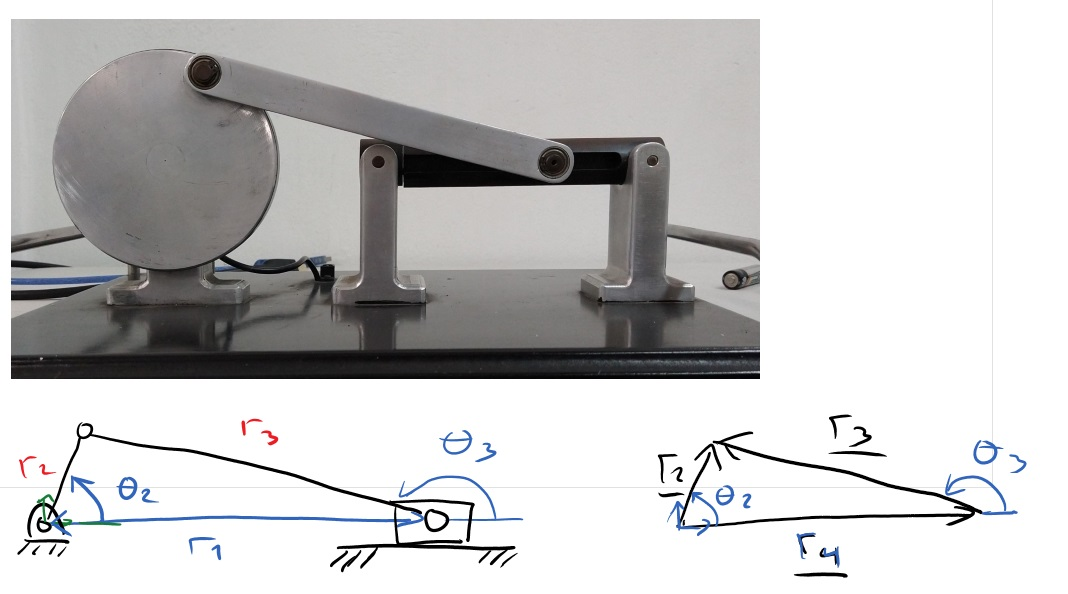

## Análisis vectorial

Partiendo de este diagrama vectorial, podemos obtener la siguiente ecuación vectorial

$\overrightarrow{r_{2}}-\overrightarrow{r_{3}}-\overrightarrow{r_{4}}=0$ , o su equivalente $\overrightarrow{r_{2}}+\overrightarrow{r_{3'}}-\overrightarrow{r_{4}}=0$(1)

cuyas ecuaciones escalares correspondientes son

$r2\cdot cos(\theta_{2})-r3\cdot cos(\theta_{3})-r4=0$, (2)

$r2\cdot sin(\theta_{2})-r3\cdot sin(\theta_{3})=0$ (3)

En este cuaderno desarrollaremos el análisis de velocidad y aceleración. Para esto debemos contar con el análisis de posición correctamente desarrollado.

Para ver este desarrollo con las anotaciones correspondientes:

### 

In [232]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from matplotlib.animation import FuncAnimation


def manivelaCorredera(condIni, params):
    #variable de entrada y parámetros
    ## Primero la variable de entrada
    th2 = params[0]
    ## Luego los parámetros
    r2 = params[1]
    r3 = params[2]
    
    # las condiciones iniciales deben darse para que el método funcione
    th3 = condIni[0]
    r4 = condIni[1]
    
    # creamos el vector donde quedará la salida, inicialmente con ceros
    Y = np.zeros(2)
    # Definimos las ecuaciones escalares no lineales
    Y[0] = r2*np.cos(th2) - r3*np.cos(th3) - r4
    Y[1] = r2*np.sin(th2) - r3*np.sin(th3)
    
    return Y

# le damos valores a los parámetros y variables

r2 = 5
r3 = 17.5
th2 = np.deg2rad(0)

# Declaramos las condiciones iniciales

th2 = np.deg2rad(0)
varEntrada = th2
params = [varEntrada,r2,r3]

print("Parámetros: ",params)

th3 = np.deg2rad(180)
r4 = 22.5

x0 = np.array([th3,r4])
print("Condiciones iniciales: ",x0)
# ...y probamos la función

Y = manivelaCorredera(x0, params)
print("Evaluación de la función: ",Y)

# si el resultado es un array con valores cercanos a cero, la implementación del análisis está bien. Como regla, si el valor entero es 0, sirve.
# 
# Ahora especificamos el número de iteraciones

numpos = 50

# Luego definimos el vector que contiene los valores de la variable de entrada que queremos analizar

th2v = np.linspace(0,2*np.pi,numpos)

# Y continuamos con el resto del programa. Esto al fin y al cabo es una prueba.

th3v = np.zeros(numpos)
r4v = np.zeros(numpos)
exitflagV = np.zeros(numpos)

# Probar fsolve

[th3,r4] = fsolve(manivelaCorredera,x0, args = params)

print("Solución usando fsolve: ",np.rad2deg(th3),r4,)

# esto debe dar valores de las variables secundarias, verificar con análisis gráfico
# 
# ## Solución al sistema de ecuaciones con fsolve
for i in range(0,numpos):
    params[0] = th2v[i]
    q,info,exitflagV[i],mensaje = fsolve(manivelaCorredera,
                                        x0, 
                                        args = params,
                                        full_output = True)
    th3v[i] = q[0]
    r4v[i] = q[1]
    x0 = q
    if exitflagV[i] != 1:
        print('Error en la iteración ' + str(i))
        break
if i+1 == numpos:
    print('se ejecutaron todas las iteraciones: ' + str(numpos))
    print(np.rad2deg(th3v))
    print(r4v)

Parámetros:  [0.0, 5, 17.5]
Condiciones iniciales:  [ 3.14159265 22.5       ]
Evaluación de la función:  [ 0.0000000e+00 -2.1431319e-15]
Solución usando fsolve:  180.0 22.5
se ejecutaron todas las iteraciones: 50
[180.         177.90615636 175.84397443 173.84496392 171.94029026
 170.1605047  168.53516675 167.0923405  165.8579643  164.85511629
 164.10322405 163.61729097 163.40722681 163.47736961 163.82626713
 164.44675072 165.32629014 166.44757758 167.7892605  169.32673393
 171.03291049 172.8789073  174.83461413 176.8691328  178.95109764
 181.04890236 183.1308672  185.16538587 187.1210927  188.96708951
 190.67326607 192.2107395  193.55242242 194.67370986 195.55324928
 196.17373287 196.52263039 196.59277319 196.38270903 195.89677595
 195.14488371 194.1420357  192.9076595  191.46483325 189.8394953
 188.05970974 186.15503608 184.15602557 182.09384364 180.        ]
[22.5        22.44726576 22.2904562  22.0337035  21.68373717 21.24964897
 20.74256728 20.17524747 19.56159075 18.91611133 18.25

## Análisis de velocidad: teoría

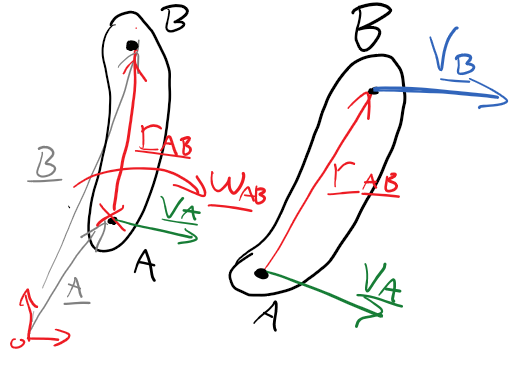

Aplicaremos la siguiente ecuación para modelar la velocidad de cada cuerpo rígido (barra) del mecanismo:

$\overrightarrow{V_B} = \overrightarrow{V_A}+\overrightarrow{\omega}\times \overrightarrow{r_{AB}}$, (4)

Donde $\overrightarrow{\omega}$ es el vector de velocidad angular de la barra analizada.

Usualmente no tenemos el valor de $\overrightarrow{\omega}$, ya que las componentes escalares de esta son

$\overrightarrow{\omega} = \begin{bmatrix}
0 & 0 & \dot{\theta} 
\end{bmatrix}$ (5)

siendo $\dot{\theta}$ la magnitud de la velocidad angular de la barra analizada. Esta cantidad la obtenemos derivando con respecto al tiempo las ecuaciones de posición escalares, obtenidas a partir de las ecuaciones de cierre vectorial.

### Velocidad de la barra de entrada

Si la barra analizada es una barra de entrada, la derivada con respecto al tiempo de la variable de entrada asociada **debe ser conocida para poder completar el análisis**. Si la variable de entrada es un ángulo:

$\frac{\mathrm{d} \theta}{\mathrm{d} t} = \dot{\theta}$

Si la variable de entrada es una distancia:

$\frac{\mathrm{d} r}{\mathrm{d} t} = \dot{r}$

### Sympy: matemáticas simbólicas

Utilizaremos este módulo para realizar las derivadas simbólicas. Importamos el módulo básico y uno adicional para simplificar la notación de Newton

In [233]:
import sympy as sym
from sympy.physics.mechanics import dynamicsymbols, init_vprinting

sym.init_printing(use_unicode=False, wrap_line=True)
init_vprinting()

Ahora definimos el tiempo como variable independiente, luego todas las demás variables dependientes del tiempo

In [234]:
t = sym.Symbol('t')
# Parámetros
r2s = sym.Symbol('r_2')
r3s = sym.Symbol('r_3')
# Variables definidas como funcion para luego hacerlas depender de t
th2s, th3s, r4s = sym.symbols('theta_2 theta_3 r_4', cls=sym.Function)
# Primera derivada de las variables con respecto al tiempo
th2sp = sym.diff(th2s(t),t)
th3sp = sym.diff(th3s(t),t)
r4sp = sym.diff(r4s(t),t)
# Segunda derivada de las variables con respecto al tiempo
th2spp = sym.diff(th2s(t),t,t)
th3spp = sym.diff(th3s(t),t,t)
r4spp = sym.diff(r4s(t),t,t)

Luego derivamos cada una de las expresiones de las ecuaciones (2) y (3) con respecto a t:

Partimos de las ecuaciones implementadas en la función:
```python
    Y[0] = r2*np.cos(th2) - r3*np.cos(th3) - r4
    Y[1] = r2*np.sin(th2) - r3*np.sin(th3)
``` 
Las ecuaciones a derivar se implementarían así (notemos las semejanzas con las anteriores):

In [235]:
eq1 = r2s*sym.cos(th2s(t)) - r3s*sym.cos(th3s(t)) - r4s(t)
eq2 = r2s*sym.sin(th2s(t)) - r3s*sym.sin(th3s(t))
eq1,eq2

Ahora las derivamos con respecto al tiempo

In [236]:
eq1p = sym.diff(eq1,t)
eq2p = sym.diff(eq2,t)
eq1p

In [237]:
eq2p

#### Expresando el sistema de ecuaciones en forma matricial

Para hacer esto debemos usar la función "linear_eq_to_matrix", el problema es que esta función no reconoce las derivadas como las incógnitas, hay que reemplazar las derivadas por símbolos para generar el sistema matricial

In [238]:
th2ssym, th3ssym, r4ssym = sym.symbols('theta_2 theta_3 r_4')
th2spsym, th3spsym, r4spsym = sym.symbols('\dot{\\theta_2} \dot{\\theta_3} \dot{\\r_4}')
th2sppsym, th3sppsym, r4sppsym = sym.symbols('\ddot{\\theta_2} \ddot{\\theta_3} \ddot{\\r_4}')
th2ssym,th2spsym,th2sppsym

Podemos observar que estos símbolos son idénticos a las derivadas con respecto al tiempo, pero al definirlos de esta forma, para sympy no están relacionados con el tiempo (t).

Ahora solo debemos reemplazar usando la función "subs" de sympy.

In [239]:
eq1psym = eq1p.subs([
                  (th2sp,th2spsym),
                  (th3sp,th3spsym),
                  (r4sp,r4spsym)
                   ])
eq2psym = eq2p.subs([
                  (th2sp,th2spsym),
                  (th3sp,th3spsym),
                  (r4sp,r4spsym)
                    ])
eqns = [eq1psym,eq2psym]
As, bs = sym.linear_eq_to_matrix(eqns, [th3spsym,r4spsym])
As

⎡r₃⋅sin(θ₃)   -1⎤
⎢               ⎥
⎣-r₃⋅cos(θ₃)  0 ⎦

In [240]:
bs

⎡\dot{\theta_2}⋅r₂⋅sin(θ₂) ⎤
⎢                          ⎥
⎣-\dot{\theta_2}⋅r₂⋅cos(θ₂)⎦

Al hacer clic derecho sobre las ecuaciones resultantes, se puede copiar el código TeX para usarlo abajo.
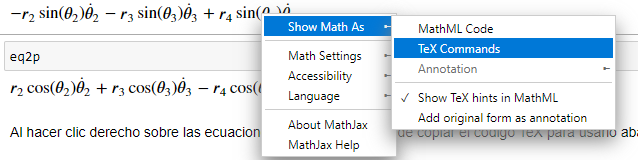

$\displaystyle - r_{2} \operatorname{sin}\left(\theta_{2}\right) \dot{\theta}_{2} - r_{3} \operatorname{sin}\left(\theta_{3}\right) \dot{\theta}_{3} - \dot{r}_{4} = 0$, (6)

$\displaystyle r_{2} \operatorname{cos}\left(\theta_{2}\right) \dot{\theta}_{2} + r_{3} \operatorname{cos}\left(\theta_{3}\right) \dot{\theta}_{3}=0$. (7)

### Derivadas de las ecuaciones de cierre vectorial

Derivando (1) y (2) con respecto al tiempo tenemos

$-r_2sin(\theta_{2})\dot{\theta_{2}} + r_3sin(\theta_{3})\dot{\theta_{3}} - \dot{r_{4}}=0$, (6)

$r_2cos(\theta_{2})\dot{\theta_{2}} - r_3cos(\theta_{3})\dot{\theta_{3}}=0$. (7)

Podemos notar que este sistema de ecuaciones es LINEAL, por lo que podemos usar álgebra lineal para resolverlo. Para esto planteamos el sistema en forma matricial, específicamente de la forma $Ax=b$. En este caso

$A = \displaystyle \left[\begin{matrix}r_{3} \operatorname{sin}\left(\theta_{3}\right) & -1\\- r_{3} \operatorname{cos}\left(\theta_{3}\right) & 0\end{matrix}\right]$,

$x = \begin{bmatrix}
\dot{\theta_{3}}\\ 
\dot{r_{4}}
\end{bmatrix}$ y

$b = \displaystyle \left[\begin{matrix}\dot{\theta_2} r_{2} \operatorname{sin}\left(\theta_{2}\right)\\- \dot{\theta_2} r_{2} \operatorname{cos}\left(\theta_{2}\right)\end{matrix}\right]$

### Variable de entrada

En este caso, la variable de entrada es $\theta_2$, por lo cual debemos dar valores a $\dot{\theta_2}$. Vamos a asumir en este caso que la manivela rota a 60 rev/m, i.e., 1 rev/s

In [241]:
th2p = 2*np.pi # velocidad en radianes por segundo

### Solución del sistema de ecuaciones lineal

Usaremos la función solve del módulo numpy.linalg. Descomente la siguiente línea para revisar la ayuda

In [242]:
#help(np.linalg.solve)
#dir(np.linalg)

Hagámoslo para una sola posición inicialmente

In [243]:
pos = 15 #posicion 15 de numpos posiciones
th2 = th2v[pos]
th3 = th3v[pos]
r4 = r4v[pos]
print("theta2= ",np.rad2deg(th2),"theta3= ",np.rad2deg(th3),"r4= ",r4)

am = [[r3*np.sin(th3),-1],
      [-r3*np.cos(th3),0]]
bv = [r2*np.sin(th2)*th2p,
      -r2*np.cos(th2)*th2p]
print(am,bv)
[th3p,r4p] = np.linalg.solve(am,bv) # el resultado de solve es el vector x
print(th3p,r4p)

theta2=  110.20408163265306 theta3=  164.4467507181718 r4=  15.132353993812243
[[4.692342110248806, -1], [16.859179265918783, 0]] [29.482855003375327, 10.849963177766188]
0.6435641383622771 -26.463031896292026


#### Reemplazando las matrices obtenidas con Sympy

Para evaluar una expresión simbólica debemos usar la función "lambdify". Para esto: 
1. creamos una lista con los símbolos que queremos reemplazar por números, 
2. luego creamos una función usando sym.lambdify que evalua dichos símbolos de la expresión a evaluar (en este caso As y bs), 
3. por último llamamos a la función creada especificando los valores numéricos a utilizar. 

El resutlado es la expresión simbólica evaluada en esos números

In [244]:
# Matriz A
# definir variables a evaluar
varA = [r3s, th3s(t)]
# crear función a partir de la expresión simbólica
a_func = sym.lambdify(varA, As, modules='numpy')
# evaluar con valores numéricos específicos
am = a_func(r3,th3)

# Vector b
varb = [r2s, th2s(t), th2spsym]
b_func = sym.lambdify(varb, bs, modules='numpy')
bv = b_func(r2,th2,th2p).reshape(2) # reshape para que quede como vector de una dimensión y no saque warnings.

print(am,bv)
[th3p,r4p] = np.linalg.solve(am,bv) # el resultado de solve es el vector x
print(th3p,r4p)

[[ 4.69234211 -1.        ]
 [16.85917927  0.        ]] [29.482855   10.84996318]
0.643564138362277 -26.463031896292026


Podemos observar que el resultado es el mismo al obtenido al plantear las matrices a mano.

Cabe resaltar que las funciones a_func y b_func se pueden usar con cualquier otro grupo de valores.

## Velocidad de un punto

Ahora si podemos usar la ecuación de velocidad de un punto de cualquier barra (4). 

Primero definamos los puntos que vamos a analizar:

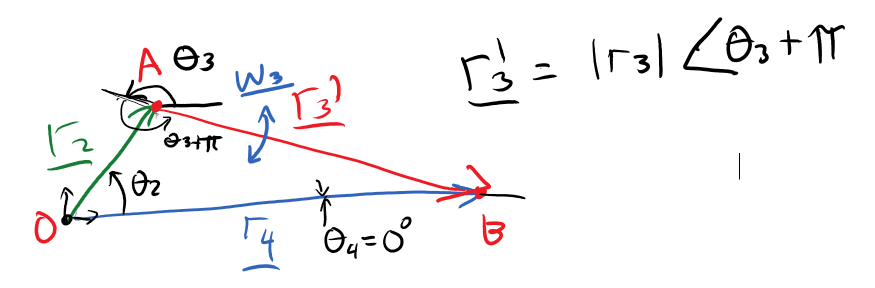

Ahora definamos cada elemento:

In [245]:
w2v = [0,0,th2p]
r2v = [r2*np.cos(th2),r2*np.sin(th2),0]
velA = np.cross(w2v,r2v)
print(velA)

[-29.482855   -10.84996318   0.        ]


El vector $\overrightarrow{V_A}$ tiene las componentes de la velocidad del punto A en mm/s

Ahora para calcular $\overrightarrow{V_B}$

Nota: recordemos que debemos usar el vector $r_{3'}$, cuya dirección es $\theta_3 + \pi$

In [246]:
w3v = [0,0,th3p]
r3v = [r3*np.cos(th3+np.pi),r3*np.sin(th3+np.pi),0]
velB = velA + np.cross(w3v,r3v)
print(velB)

[-2.64630319e+01 -1.77635684e-15  0.00000000e+00]


## Graficar vectores de velocidad

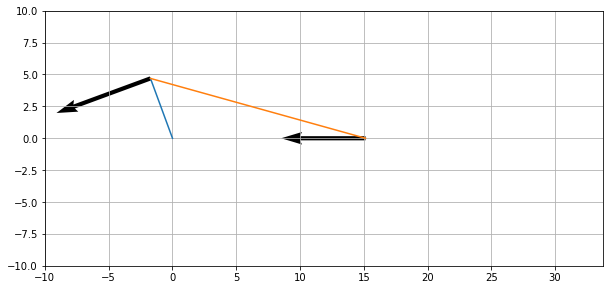

In [247]:
# ## Ubicación de puntos para animación
Ox = 0
Oy = 0
Ax = r2*np.cos(th2v)
Ay = r2*np.sin(th2v)
Bx = Ax - r3*np.cos(th3v)
By = Ay - r3*np.sin(th3v)

# ## Preparación de animación
fig = plt.figure()
plt.rcParams['figure.figsize'] = [10, 10]
hr2 = plt.plot([Ox,Ax[pos]],[Oy,Ay[pos]])
hr3 = plt.plot([Bx[pos],Ax[pos]],[By[pos],Ay[pos]])

hVA = plt.quiver(Ax[pos], Ay[pos], velA[0], velA[1],scale_units='xy', scale=4)
hVB = plt.quiver(Bx[pos], By[pos], velB[0], velB[1],scale_units='xy', scale=4)

plt.axis("scaled")
plt.xlim(-r2*2,(r2+r3)*1.5)
plt.ylim(-r2*2,r2*2)
plt.grid()
plt.draw() 

## Análisis de aceleración

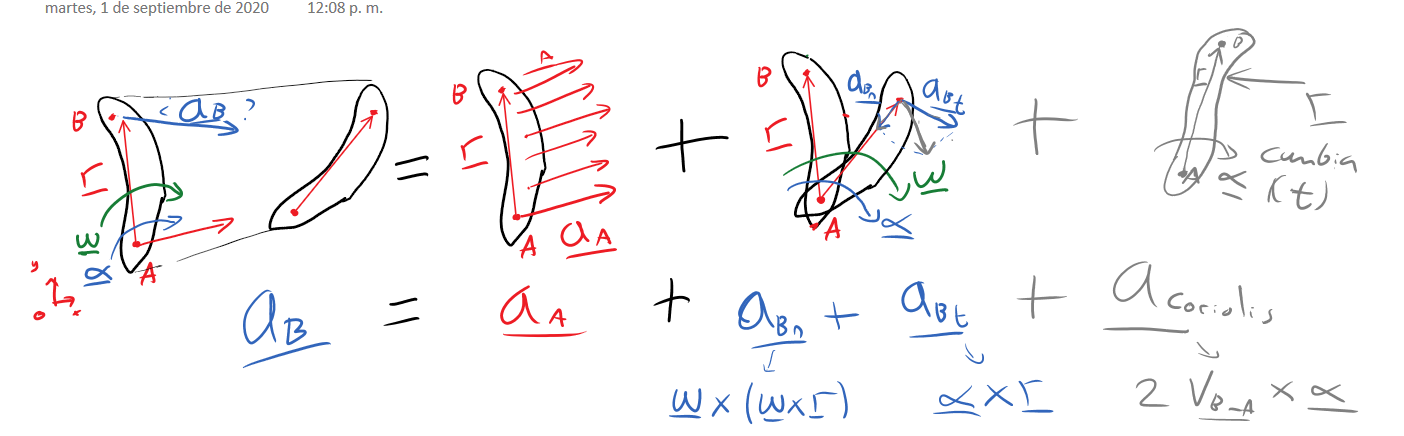

Aplicaremos la siguiente ecuación para modelar la velocidad de cada cuerpo rígido (barra) del mecanismo:

$\overrightarrow{a_B} = \overrightarrow{a_A}+\overrightarrow{a_{B_n}} + \overrightarrow{a_{B_t}} + \overrightarrow{a_{coriolis}}$, (8)

donde $\overrightarrow{a_{B_n}} = \overrightarrow{\omega}\times (\overrightarrow{\omega}\times\overrightarrow{r_{AB}})$, 

$\overrightarrow{a_{B_t}} = \overrightarrow{\alpha}\times \overrightarrow{r_{AB}}$ y

$\overrightarrow{a_{coriolis}} = 2\overrightarrow{V_{B-A}}\times\overrightarrow{\alpha}$.

De lo anterior, $\overrightarrow{\alpha}$ es el vector de aceleración angular del cuerpo, la componente $\overrightarrow{V_{B-A}}$ aparece si el punto $B$ se mueve con respecto al punto $A$.

Procedemos de manera similar al análisis de velocidad:

Usualmente no tenemos el valor de $\overrightarrow{\alpha}$, ya que las componentes escalares de esta son

$\overrightarrow{\alpha} = \begin{bmatrix}
0 & 0 & \ddot{\theta} 
\end{bmatrix}$ (9)

siendo $\ddot{\theta}$ la magnitud de la aceleración angular de la barra analizada. Esta cantidad la obtenemos derivando con respecto al tiempo las ecuaciones de velocidad (6) y (7).

### Aceleración de la barra de entrada

Si la barra analizada es una barra de entrada, la segunda derivada con respecto al tiempo de la variable de entrada asociada **debe ser conocida para poder completar el análisis**. Si la variable de entrada es un ángulo:

$\frac{\mathrm{d^2} \theta}{\mathrm{d} t^2} = \ddot{\theta}$

Si la variable de entrada es una distancia:

$\frac{\mathrm{d^2} r}{\mathrm{d} t^2} = \ddot{r}$

### Derivación usando Sympy - continuación

Como debemos derivar por segunda vez las ecuaciones de posición con respecto al tiempo, podemos reutilizar las expresiones hayadas previamente:

In [248]:
eq1p,eq2p

Derivamos estas con respecto al tiempo

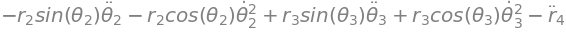

In [249]:
eq1pp = sym.diff(eq1p,t)
eq2pp = sym.diff(eq2p,t)
eq1pp

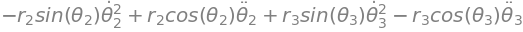

In [250]:
eq2pp

Ahora llevándolo a la forma matricial

In [251]:
eq1ppsym = eq1pp.subs([
                  (th2spp,th2sppsym),
                  (th3spp,th3sppsym),
                  (r4spp,r4sppsym)
                   ])
eq2ppsym = eq2pp.subs([
                  (th2spp,th2sppsym),
                  (th3spp,th3sppsym),
                  (r4spp,r4sppsym)
                    ])
eqns = [eq1ppsym,eq2ppsym]
As2, bs2 = sym.linear_eq_to_matrix(eqns, [th3sppsym,r4sppsym])
As2

⎡r₃⋅sin(θ₃)   -1⎤
⎢               ⎥
⎣-r₃⋅cos(θ₃)  0 ⎦

In [252]:
bs2

⎡                                          2                2 ⎤
⎢\ddot{\theta_2}⋅r₂⋅sin(θ₂) + r₂⋅cos(θ₂)⋅θ₂̇  - r₃⋅cos(θ₃)⋅θ₃̇  ⎥
⎢                                                             ⎥
⎢                                           2                2⎥
⎣-\ddot{\theta_2}⋅r₂⋅cos(θ₂) + r₂⋅sin(θ₂)⋅θ₂̇  - r₃⋅sin(θ₃)⋅θ₃̇ ⎦

### Solución del sistema de ecuaciones

las segundas derivadas de las ecuaciones de posición serían:

$ \displaystyle - r_{2} \operatorname{sin}\left(\theta_{2}\right) \ddot{\theta}_{2} - r_{2} \operatorname{cos}\left(\theta_{2}\right) \dot{\theta}_{2}^{2} - r_{3} \operatorname{sin}\left(\theta_{3}\right) \ddot{\theta}_{3} - r_{3} \operatorname{cos}\left(\theta_{3}\right) \dot{\theta}_{3}^{2} - \ddot{r}_{4}=0$, (10)

$ \displaystyle - r_{2} \operatorname{sin}\left(\theta_{2}\right) \dot{\theta}_{2}^{2} + r_{2} \operatorname{cos}\left(\theta_{2}\right) \ddot{\theta}_{2} - r_{3} \operatorname{sin}\left(\theta_{3}\right) \dot{\theta}_{3}^{2} + r_{3} \operatorname{cos}\left(\theta_{3}\right) \ddot{\theta}_{3}=0$. (11)

Podemos notar que este sistema de ecuaciones es LINEAL, por lo que podemos usar álgebra lineal para resolverlo. Para esto planteamos el sistema en forma matricial, específicamente de la forma $Ax=b$. En este caso

$A = \displaystyle \left[\begin{matrix}- r_{3} \operatorname{sin}\left(\theta_{3}\right) & -1\\r_{3} \operatorname{cos}\left(\theta_{3}\right) & 0\end{matrix}\right]$,

$x = \begin{bmatrix}
\ddot{\theta_{3}}\\ 
\ddot{r_{4}}
\end{bmatrix}$ y

$b = \displaystyle \left[\begin{matrix}\ddot{\theta_2} r_{2} \operatorname{sin}\left(\theta_{2}\right) + r_{2} \operatorname{cos}\left(\theta_{2}\right) \dot{\theta}_{2}^{2} - r_{3} \operatorname{cos}\left(\theta_{3}\right) \dot{\theta}_{3}^{2}\\- \ddot{\theta_2} r_{2} \operatorname{cos}\left(\theta_{2}\right) + r_{2} \operatorname{sin}\left(\theta_{2}\right) \dot{\theta}_{2}^{2} - r_{3} \operatorname{sin}\left(\theta_{3}\right) \dot{\theta}_{3}^{2}\end{matrix}\right]$

### Variable de entrada

En este caso, la variable de entrada es $\theta_2$, por lo cual debemos dar valores a $\ddot{\theta_2}$. Como anteriormente asumimos una velocidad angular constante para la barra de entrada, $\ddot{\theta_2} = 0$.

Ahora vamos a crear la función para evaluar el vector bs2. Notemos que A es la misma matriz que para el análisis de velocidad, por lo cual no es necesario redefinir la función.

In [253]:
# igual hay que reemplazar los términos que tengan derivadas, ya que lambdify no los reconoce.
bs2 = bs2.subs([(th2sp,th2spsym),
                (th3sp,th3spsym),
                (r4sp,r4spsym)
                ])
# definir variables a evaluar
varb = [r2s,r3s,th2s(t), th2spsym, th2sppsym, th3s(t), th3spsym, r4s(t), r4spsym]
# crear función a partir de la expresión simbólica
b2_func = sym.lambdify(varb, bs2, modules='numpy')
# evaluar con valores numéricos específicos
bv = b2_func(r2,r3,th2,th2p,0,th3,th3p,r4,r4p).reshape(2) # reshape para que quede como vector de una dimensión y no saque warnings.

[th3pp,r4pp] = np.linalg.solve(am,bv) # el resultado de solve es el vector x
print(th3pp,r4pp)
print(th2,th3,r4)

10.872580961609932 112.20755151147026
1.9234240736264039 2.870137244238448 15.132353993812243


### Solución del sistema lineal

El método de solución es el mismo utilizado para hallar la velocidad. Revisar procedimiento en la parte superior

In [254]:
# La matriz A fue definida en el cálculo de la velocidad y es la misma
bv = [r2*np.cos(th2)*th2p**2 - r3*np.cos(th3)*th3p**2,
      r2*np.sin(th2)*th2p**2 - r3*np.sin(th3)*th3p**2]
xv = np.linalg.solve(am,bv) # el resultado de solve es el vector x
th3pp = xv[0]
r4pp = xv[1]
print(th3pp,r4pp)
print(th2,th3,r4)

10.872580961609932 112.20755151147026
1.9234240736264039 2.870137244238448 15.132353993812243


In [255]:
#help(plt.quiver)

## Análisis de velocidad y aceleración para un rango de valores



In [260]:
#Velocidad analitica
th3pv=np.zeros(numpos)
r4pv=np.zeros(numpos)
th3ppv=np.zeros(numpos)
r4ppv=np.zeros(numpos)
velAm=np.zeros((numpos,3))
velBm=np.zeros((numpos,3))
for i in range(0,numpos):
    # A mano
#     am = [[r3*np.sin(th3v[i]),-1],
#           [-r3*np.cos(th3v[i]),0]]
#     bv = [r2*np.sin(th2v[i])*th2p,
#           -r2*np.cos(th2v[i])*th2p]
    # Usando Sympy
    am = a_func(r3,th3v[i])
    bv = b_func(r2,th2v[i],th2p)
    xv = np.linalg.solve(am,bv)
    th3pv[i] = xv[0]
    r4pv[i] = xv[1]
    
    w2v = [0,0,th2p]
    r2v = [r2*np.cos(th2v[i]),r2*np.sin(th2v[i]),0]
    velA = np.cross(w2v,r2v)
    #print(velA)
    w3v = [0,0,th3pv[i]]
    r3v = [r3*np.cos(th3v[i]+np.pi),r3*np.sin(th3v[i]+np.pi),0]
    velB = velA + np.cross(w3v,r3v)
    #print(velB)
    velAm[i,:] = velA
    velBm[i,:] = velB

    # aceleración
    # A mano
#     bv = [r2*np.cos(th2v[i])*th2p**2 - r3*np.cos(th3v[i])*th3pv[i]**2,
      r2*np.sin(th2v[i])*th2p**2 - r3*np.sin(th3v[i])*th3pv[i]**2]
    # Usando las expresiones encontradas con sympy
    bv = b2_func(r2,r3,th2v[i],th2p,0,th3v[i],th3pv[i],r4v[i],r4pv[i])
    xv = np.linalg.solve(am,bv) # el resultado de solve es el vector x
    th3ppv[i] = xv[0]
    r4ppv[i] = xv[1]
    
    
th3pNumv=np.gradient(th3v,th2v)*th2p
r4pNumv=np.gradient(r4v,th2v)*th2p
th3ppNumv=np.gradient(np.gradient(th3v,th2v),th2v)*th2p**2
r4ppNumv=np.gradient(np.gradient(r4v,th2v),th2v)*th2p**2
#print(velAv)

IndentationError: unexpected indent (<ipython-input-260-a38ed6b7ef73>, line 35)

Text(0.5, 0, 'Theta2')

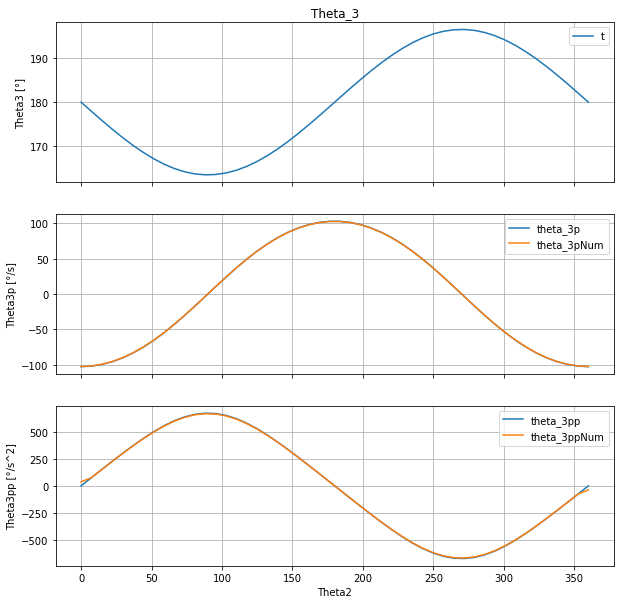

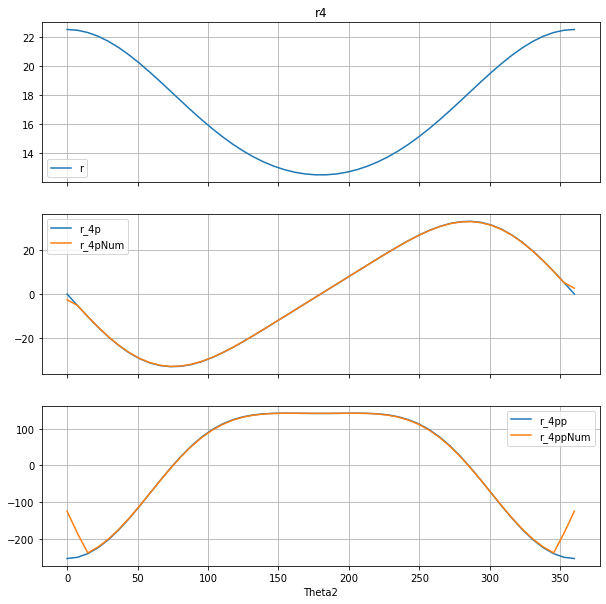

In [261]:
#con subplots
f, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True)
ax1.plot(np.rad2deg(th2v),np.rad2deg(th3v))
ax1.set_title('Theta_3')
ax1.grid()
ax1.legend("theta_3")
ax1.set_ylabel("Theta3 [°]")
ax2.plot(np.rad2deg(th2v),np.rad2deg(th3pv))
ax2.plot(np.rad2deg(th2v),np.rad2deg(th3pNumv))
ax2.grid()
ax2.legend(["theta_3p","theta_3pNum"])
ax2.set_ylabel("Theta3p [°/s]")
ax3.plot(np.rad2deg(th2v),np.rad2deg(th3ppv))
ax3.plot(np.rad2deg(th2v),np.rad2deg(th3ppNumv))
ax3.grid()
ax3.legend(["theta_3pp","theta_3ppNum"])
ax3.set_xlabel("Theta2")
ax3.set_ylabel("Theta3pp [°/s^2]")

#con subplots
f, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True)
ax1.plot(np.rad2deg(th2v),r4v)
ax1.set_title('r4')
ax1.grid()
ax1.legend("r4")
ax2.plot(np.rad2deg(th2v),r4pv)
ax2.plot(np.rad2deg(th2v),r4pNumv)
ax2.grid()
ax2.legend(["r_4p","r_4pNum"])
ax3.plot(np.rad2deg(th2v),r4ppv)
ax3.plot(np.rad2deg(th2v),r4ppNumv)
ax3.grid()
ax3.legend(["r_4pp","r_4ppNum"])
ax3.set_xlabel("Theta2")

In [258]:
# ## Animación
# 
# Definimos la función que dibuja cada cuadro (plot)

# In[177]:


def animar(i):
    manivelaX = np.array([Ox,Ax[i]])
    manivelaY = np.array([Oy,Ay[i]])
    acopladorX = np.array([Bx[i],Ax[i]])
    acopladorY = np.array([By[i],Ay[i]])
    hr2[0].set_xdata(manivelaX)
    hr2[0].set_ydata(manivelaY)
    hr3[0].set_xdata(acopladorX)
    hr3[0].set_ydata(acopladorY)
    hVA.set_offsets([Ax[i], Ay[i]])
    hVA.set_UVC(velAm[i,0],velAm[i,1])

    hVB.set_offsets([Bx[i], By[i]])
    hVB.set_UVC(velBm[i,0],velBm[i,1])
    
animacion = FuncAnimation(fig, animar, interval=3000/numpos, save_count=numpos)

# Si se desea visualizar en un frame HTML5 para animaciones que queden muy pesadas en GIF (descomentar para publicación en NBViewer):

from IPython.display import HTML
HTML(animacion.to_html5_video())

In [259]:
#dir(hVA)